# Midterm
# Student ID: XXXXXXXXX <font color = 'red'> (XX / 100) </font>

## General comments 
This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the 5 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. **You or not allowed to share documents, or communicate in any other way with people inside or outside the classroom during the midterm.** To finish the midterm in the alloted 2 hrs, you will have to work efficiently. **Read the entirety of each question carefully.**

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [28]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, and statsmodels.

### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

import sklearn as sk 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error

---
## Data set 
The Child Health and Development Studies investigate a range of topics. One study considered all pregnancies between 1960 and 1967 among women in the Kaiser Foundation Health Plan in the San Francisco East Bay area.

The data frame contains the following data, where each row represents a baby:

- bwt: birth weight (ounces)
- gestation: length of pregnancy (days)
- parity: 0 if mom's first baby, 1 if not mom's first baby
- age: mom's age (years)
- height: mom's height (inches)
- weight: mom's weight (pounds)
- smoke: 0 if mom is nonsmoker, 1 if mom is smoker

Note that babies that are born with a gestation of less than 37 weeks (259 days) are considered pre-term. The survival rate of babies born before week 22 (154 days) have a survival chance of only 6%.

Overall this midterm will focus on building a good predictive model for the **birth weight** of a baby. This is because low birthweight is a strong risk factor for various developement delays and disorders.

In [29]:
# Load the data set and drop the case number, as well as any Missing observations: 
df = pd.read_csv('babies.csv').drop('case',axis='columns').dropna()

---
---
## Task 1: Choosing a training loss function (35pt)

---
### Question 1.1 - Warm up (X / 2 pt)
Written answer: report the number of observations and the number of variables that you have in the data set. 

In [30]:
print("There are ",df.shape[0], "complete observations in the data set.")
print("There are ",df.shape[1], "variables in the data set.")

There are  1174 complete observations in the data set.
There are  7 variables in the data set.


### Question 1.2 - visualization (X / 5pt)
Generate a plot that visualizes the joint distribution of gestation and birth weight. Also display plots that show the marginal distributions of gestation and birth weight seperately.  

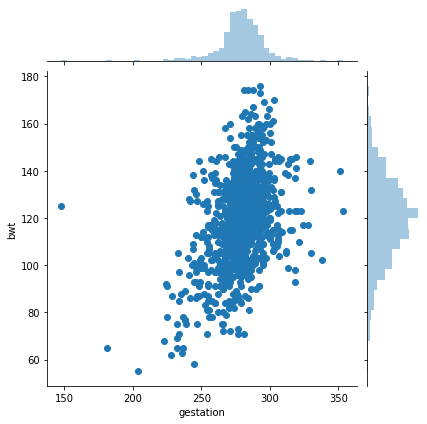

In [31]:
# Any properly labeled plot of the joint and 2 marginal distribution is acceptable
sns.jointplot(df.gestation,df.bwt)

---
### Question 1.3 - Outliers (X / 5pt)
Written answer: Based on the plot that shows the joint distribution of birth weight and gestation, check for ourliers in the data set. Are there unusual observations in the data set? Would you include or exclude them in the analysis? Please justify your answer. 

*Please note that independent of your answer, we will actually not remove any observation from the data set for further analysis*

*For full points, the answer needs to be based on the joint distrubtion. No absolute right answer here, but arguing that the observation is included as survival rate is <6%, or not noting the unusal weight will not give points*  
There is one very pre-term baby (<150 days), with a normal birth weight.  Based on the general distribution of the values,such observations seems very unlikely, and may be due to a coding error. I would therefor exclude this obsrvation from the data set. 

---
### Question 1.4 - Different training losses (X/13pt)
We now want to build a good predictive model for birth weight, based on a 3-rd order polynomial expansion on gestation. To do so, we first want to decide whether to build a model using a squared error training loss function, or a absolute deviation training loss function. To do so, take the following steps: 

* reserve 300 data points as a test set (random_state = 0)
* define a model with 1st, 2nd, and, 3rd order polynomial expansion of gestation 
* fit the model (including intercept) using the square error as training loss
* fit the model (including intercept) using the mean absolute deviation as training loss 
* generate a scatter plot of gestation (x-axis) and birthweight (y-axis) for the traing data and superimpose the fit of the two fitted models 

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


Text(0, 0.5, 'Birth weight')

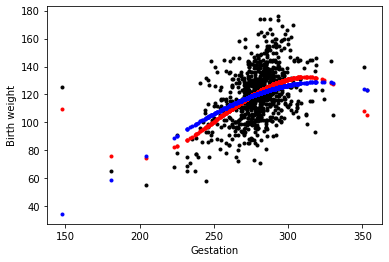

In [32]:
Dtrain,Dtest = train_test_split(df,test_size=300,random_state=0)
olsfit = smf.ols('bwt ~ gestation + I(gestation**2) + I(gestation**3)',data=Dtrain).fit()
ladfit = smf.quantreg('bwt ~ gestation + I(gestation**2) + I(gestation**3)',data=Dtrain).fit(q=0.5)

yp=np.zeros((Dtrain.shape[0],2))
yp[:,0]=olsfit.predict(Dtrain)
yp[:,1]=ladfit.predict(Dtrain)

ax=plt.subplot()
plt.plot(Dtrain.gestation,Dtrain.bwt,'k.',Dtrain.gestation,yp[:,0],'r.',Dtrain.gestation,yp[:,1],'b.')
ax.set_xlabel('Gestation')
ax.set_ylabel('Birth weight')

---
### Question 1.5 - Test error (X / 7pt)

Report the performance of *both fitted models* from Question 1.4 on the test set, using the mean absolute error as the test loss. Also report the 95% confidence interval of mean absolute error (the test loss) of each model. 


In [33]:
yp=np.zeros((Dtest.shape[0],2))
yp[:,0]=olsfit.predict(Dtest)
yp[:,1]=ladfit.predict(Dtest)


for i in range(2):
    testerr = np.abs(Dtest.bwt - yp[:,i])
    meanerr = testerr.mean()
    CI  = meanerr + 1.96 * testerr.std()/np.sqrt(300) * np.array([-1, 1])
    print('Test Error: ',meanerr)
    print('Confidence interval: ', CI)

Test Error:  12.348122474903235
Confidence interval:  [11.26535344 13.43089151]
Test Error:  12.516440801500869
Confidence interval:  [11.42549129 13.60739031]


---
### Question 1.6 Interpreting differences in test error (X / 3pt)
Written answer: Based on these numbers, which training loss would you choose? Does the data provide a strong argument for for using one of these training loss functions? Justify you answer.  

Since the squared error training loss leads to slightly lower test loss, I would choose the squared error (1pt). 
Given that the value for ols lies fully in the confidence interval of the absolute error fit, there is not really very strong evidence for picking either of them (2pts). 

*For the second port, any answer that puts the difference in MAE into relationship with the CI should get points, even if they are based on a incorrectly calculated CI. Answers that are purely based on the MAE get no points*


---
---
## Task 2: Selecting more features for a better model (30pt)

---
### Question 2.1 - Selecting features using forward search (23pt)

For Task 2, use the same data, and training / test split as in task 1, and use the mean squared error as the training loss function. *Just using the training data*, please select what variables that you want to include in the model (over and above gestation) to make the best possible prediction for the test data. 
Start with a model that uses the a 3-rd order polynomial expansion on gestation as a base model. Then decide - using forward search - whether to include **age** and/or **smoke** as a variable into the model. Show all the steps of your forward seearch and explcitly justify which models you are trying. Note that you could also decide that it's best not to include any new variables.  

Written answer: Decide whether to use the (mean squared) training error or the (mean squared) validation error (obtained using 5-fold crossvalidation) to select the best model. Justify why you are using which.

Finally report the best model. 

For choosing which variables to include, I am using the validation error (using crossvalidation on the training set). If I used the training error (i.e. fit), I would simply select the most complex model, but not the one that likely will make the best prediction. (5pt)

In [34]:
# Build a pipeline 
pip = Pipeline([
    ('standardize', StandardScaler()),
    ('reg', LinearRegression()) ])

# I'm starting out with the base model that only contains gestation to see if any 
# new feature does something  
X = np.c_[Dtrain.gestation,Dtrain.gestation**2,Dtrain.gestation**3]
cv_score = cross_val_score(pip,X, Dtrain.bwt, cv=5, scoring = 'neg_mean_squared_error')
print ('base model',-cv_score.mean())

# I'm trying to add age 
X = np.c_[Dtrain.gestation,Dtrain.gestation**2,Dtrain.gestation**3,Dtrain.age]
cv_score = cross_val_score(pip,X, Dtrain.bwt, cv=5, scoring = 'neg_mean_squared_error')
print ('age model',-cv_score.mean())

# And then smoke 
X = np.c_[Dtrain.gestation,Dtrain.gestation**2,Dtrain.gestation**3,Dtrain.smoke]
cv_score = cross_val_score(pip,X, Dtrain.bwt, cv=5, scoring = 'neg_mean_squared_error')
print ('smoke model',-cv_score.mean())

# First conclusion: 
print ('Smoke decreases the CV error most, so I am keeping smoke')

# Now I'm trying to also add age 
X = np.c_[Dtrain.gestation,Dtrain.gestation**2,Dtrain.gestation**3,Dtrain.smoke,Dtrain.age]
cv_score = cross_val_score(pip,X, Dtrain.bwt, cv=5, scoring = 'neg_mean_squared_error')
print ('smoke+age model',-cv_score.mean())

# Final conclusion
print ('As adding age does no decrease the the CV error further, the best model is the model using gestation and smoke')


base model 278.427827297617
age model 278.23399811291836
smoke model 262.947522229304
Smoke decreases the CV error most, so I am keeping smoke
smoke+age model 263.2542491968081
As adding age does no decrease the the CV error further, the best model is the model using gestation and smoke


# ---
### Question 2.2 Describe your model selection procedure (X / 7pt)
Written answer: describe the procedure you used in 2.1, as you would in a method section of a research paper. Note: you do not need to describe specific function, but do not assume that the reader exactly knows what forward search is. You will need to give the reader sufficient information, so he/she could replicate your results.  

Need to mention 
* training / test split (1pt)
* CV only on training data (1pt)
* 5-fold CV (1pt)
* Describe base model and variables added (1pt) 
* Mean square error as a validation loss (1pt)
* Decision rule:largest decrease in validation loss (1pt)
* Stopping rule: Validation loss does not decrease further (1pt) 

---
---
## Task 3: Regularized models  (35pt)
We are now fitting and evaluting a regularized model. To get a better evaulation, we will this time use a test set of size 1000. 

In [35]:
Dtrain,Dtest = train_test_split(df,test_size=1000,random_state=0)

---
### Question 3.1: Building a complex model (X / 5pt)
For the training data, use the following polynomial features expansion to build a model to predict the birth weight (bwt):  

* gestation: 1-3rd order polynomial 
* parity: 1st order polynomial
* age: 1-2nd order polynomial 
* height: 1st order polynomial  
* smoke: 1st order polynomial 
* smoke x age interaction 
* smoke x gestation interaction 

z-standardize your regressors. 

In [36]:
D=Dtrain
Xtrain = np.c_[D.gestation,D.gestation**2,D.gestation**3,D.parity,D.age,D.age**2,D.height,D.smoke,D.smoke*D.age,D.smoke*D.gestation]
sc=StandardScaler()
Xtrain = sc.fit_transform(Xtrain)

### Question 3.2- More complex? (X / 2 pt) 
Written answer: Would it make sense to include the 2nd order polynmial of smoke? Justify your answer. 


Since smoke is a dichotmous variable with values 0 and 1, adding any basis function expansion is meaningless, as it would not change the model.  

### Question 3.3 - Training and testing error (X / 10pt)
Fit the model from 3.1 on the the training data using ridge regression with a regularization coefficient of $exp(-20)$. Evaluate the fit of the model using $R^2$ and also calculate the proportion of variance predicted on the test data. 
Then repeat the same steps, this time using a regularization coefficient of $exp(-1)$. Again report $R^2$ for training and test set.  

Written answer: How do training $R^2$ and test $R^2$ change? Why? 

In [37]:
ytrain = Dtrain.bwt.values
ridge= sk.linear_model.Ridge(alpha=np.exp(-1))
ridge.fit(Xtrain, ytrain)

# Evaluate training R2 
ypred = ridge.predict(Xtrain)
sqerr = (ytrain-ypred)**2 
train_error = sqerr.mean() 
ss = (ytrain-ytrain.mean())**2 
R2 = 1-train_error/ss.mean() 
print("training R2 : ",R2)

# Evaluate test R2  
D=Dtest
Xtest = np.c_[D.gestation,D.gestation**2,D.gestation**3,D.parity,D.age,D.age**2,D.height,D.smoke,D.smoke*D.age,D.smoke*D.gestation]
sc=StandardScaler()
Xtest = sc.fit_transform(Xtest)
ytest = Dtest.bwt
ypred = ridge.predict(Xtest)
sqerr = (ytest-ypred)**2 
test_error = sqerr.mean() 
ss = (ytest-ytest.mean())**2 
R2 = 1-test_error/ss.mean() 
print("testing R2 : ",R2)


training R2 :  0.41395498445615964
testing R2 :  0.20078954274580763


For $\lambda = exp(-20)$, the training $R^2=0.419$ and testing $R^2 = 0.145$. 
For $\lambda = exp(-1)$, training $R^2= 0.413 and testing $R^2 = 0.201$. 

Thus with increases in $\lambda$, the training R2 decreases (fits gets worse), due to increasing **bias** of the model. The prediction R2 increases due to the decreasing prediction **variance**.  

### Question 3.4 - Choosing a ridge coefficient (X / 10pt)
Based on the training set alone, use leave-one-out crossvalidation to determine the best value for the ridge coefficient. 
Vary the ridge coefficient from exp(-15) to exp(5) in 21 steps. Make a plot of the validation error against the log of the ridge coefficient. Which value for the ridge coefficient do you chose? 


In [38]:
Xtrain.shape

(174, 10)

20.085536923187668

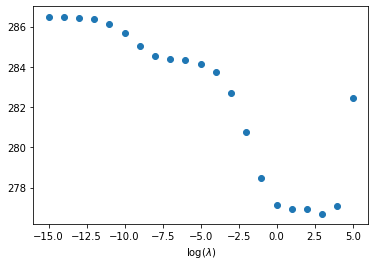

In [39]:
#Manually
alpha = np.exp(np.linspace(-15,5,21))
scores = np.zeros((21,1))
for i,a in enumerate(alpha):
    ridge = sk.linear_model.Ridge(alpha=a)
    cv_score = cross_val_score(ridge,Xtrain, ytrain, cv=174, scoring = 'neg_mean_squared_error')
    scores[i] = -cv_score.mean()
    
plt.scatter(np.log(alpha), scores)
plt.xlabel(r'$\log(\lambda)$')
alpha[np.argmin(scores)]

A $\lambda$ of 20 seems to be the best value based on these simulations. 

### Question 3.5 - A new regression method (X / 8pt)
Another researcher suggest to fit the data using a model in which the predicted values for y are:

$$ \hat{y} = exp(\beta^T \mathbf{x}_i)$$

Where $\mathbf{x}_i$ are the value for the indepenent variables for observation $i$.
The vector of regression coefficients $\beta$ is fitted by mimimzing the following objective function:  
$$ J = \sum_{i=1}^N\Bigg(-y_{i}\cdot \ln(\hat{y}_i) + \hat{y}_i + \ln(y_i!) \Bigg) + \frac{\lambda}{2} \|\beta\|^2_2.$$

Written answer: 
* What probabilistic model would justify this regression model. Clearly indicate which of the variables ($x, y , \beta, \lambda$) are considered random variables in the model and which ones are considered constants. What distribution is assumed for each of the random variables? 
* Based on the probablistic model, what would be an adequate, self-explanatory name for this new technique?  
* Do you think this new method could be appropriately applied to the current data for predicting birth weight? Which aspects would be more adequate than the ridge-regression you have been using? Which aspects would argue it is not a good model for the current problem? 

* $y , \beta$ are considered random variables, whereas $x$ and $\lambda$ are constants. The objective function is the negative log-liklihood for assuming that all $\beta$ are distributed $N(0,1/\lambda$)$ and the conditional distribution of y given x is a Poisson distribution. (4pt)
* L2-regularized Poisson regression / Ridge Poission regression. (2pt)
* On the positive side, the predicted vales of the model need to be positive. Also the variance of the observation seems to increase, as the predicted value increases, like in a Poisson distribution. On the negative side birth weight is not a count (integer numbers) and therefore cannot strictly be Poisson distributed. (2pt)